In [1]:
!pip install pandas

### Importing libraries

In [2]:
import pandas as pd

### Importing Data and Data Understanding

In [3]:
Data_1 = pd.read_csv("C:/Users/harsh/OneDrive/Documents/Kaggle/TMDB Forecasting/tmdb-box-office-prediction/train.csv")
Data_1.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [4]:
Data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [5]:
Data_1.head(3)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000


## Data Cleaning & Manipulation

#### Remove null columns & entries!

In [6]:
Data_2 = Data_1
Data_3 = Data_2.dropna(subset = ['genres', 'overview', 'runtime', 'release_date', 'title', 'cast','crew','spoken_languages','production_companies','production_countries'],how = "any")
Data_3.isna().sum()
Data_3.shape
# 196 rows removed

(2804, 23)

#### Parse the data into individual columns for each Genre!

In [7]:
import json

Data_3['genres_3'] = Data_3['genres'].str.replace("'",'"')
Data_3['genres_4'] = Data_3['genres_3'].apply(json.loads)

c:\users\harsh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\harsh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### Making a term document matrix for the Genres

In [8]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [9]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
cv.fit(Data_3['genres'])
vector = cv.fit_transform(Data_3['genres']).toarray()
Genres_pd = pd.DataFrame(data = vector, columns=cv.get_feature_names())
Genres_pd = Genres_pd.iloc[:,20:]
Genres_pd_2 = Genres_pd.drop(labels = ['name','id'], axis = 1)
Genres_pd_2['id'] = Data_3['imdb_id']

#Adding the document matrix to our original data
Data_5_org_set_index = Data_3.set_index(pd.Index(range(0,2804)))
Data_4_genres_added = pd.concat([Data_5_org_set_index, Genres_pd],axis = 1)
Data_4_genres_added

c:\users\harsh\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,movie,music,mystery,name,romance,science,thriller,tv,war,western
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,0,0,0,1,0,0,0,0,0,0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,0,0,0,4,1,0,0,0,0,0
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,0,0,0,1,0,0,0,0,0,0
3,7,NaN,14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,...,0,0,0,2,0,0,1,0,0,0
4,9,"[{'id': 256377, 'name': 'The Muppet Collection...",0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,...,0,1,0,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2799,2996,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,...,0,0,0,2,1,0,0,0,0,0
2800,2997,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,tt2364975,sv,Vi är bäst!,Three girls in 1980s Stockholm decide to form ...,3.727996,...,0,1,0,2,0,0,0,0,0,0
2801,2998,NaN,65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",NaN,tt0116908,en,The Long Kiss Goodnight,"Samantha Caine, suburban homemaker, is the ide...",14.482345,...,0,0,1,4,0,0,1,0,0,0
2802,2999,NaN,42000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://www.alongcamepolly.com/,tt0343135,en,Along Came Polly,Reuben Feffer is a guy who's spent his entire ...,15.725542,...,0,0,0,2,1,0,0,0,0,0


### Creating a binary homepage column ( Has a homepage or not)

We are creating this column on the logic that if the movie has a homepage then more people would have heard about the movie which translates to more revenue

In [10]:
import numpy as np
Data_4_genres_added['homepage_binary'] = 1
Data_4_genres_added.loc[Data_4_genres_added['homepage'].isna()==True ,'homepage_binary'] = 0
Data_4_genres_added['homepage_binary'].value_counts()

0    1909
1     895
Name: homepage_binary, dtype: int64

### Creating a binary column for Translation ( Is the movie translated from the original language or not)

The rationale to add this is because if the movie is translated then it might have a lower probability to be viewed by more people due to the fact that translation might not be done to encapsulate the emotions in the movie

In [11]:
Data_4_genres_added['spoken_languages_2'] = Data_4_genres_added['spoken_languages'].str.replace("'",'"')
Data_4_genres_added['spoken_languages_3'] = Data_4_genres_added['spoken_languages_2'].apply(json.loads)
Data_4_genres_added['Translation_binary'] = 0

#Checking if original_language has only one language or not
Data_4_genres_added['original_language'].value_counts().sum()

Data_4_genres_added['Translation_binary'] = 0

for i in range(len(Data_4_genres_added)):
    if len(Data_4_genres_added.loc[i,'spoken_languages_3']) > 1:
        Data_4_genres_added.loc[i,'Translation_binary'] = 1

Data_4_genres_added['Translation_binary'].value_counts()

0    1969
1     835
Name: Translation_binary, dtype: int64

### Multicountry launch binary variable

We would be creating another variable to see if the movie had an international launch or a domestic launch since we don't have a column for countries where the movie was launched , we will assume that production_countries is a proxy for international launch

In [12]:
Data_4_genres_added['production_countries_2'] = Data_4_genres_added['production_countries'].str.replace("'",'"')
Data_4_genres_added['production_countries_3'] = Data_4_genres_added['production_countries_2'].apply(json.loads)

Data_4_genres_added['international_launch'] = 0

for i in range(len(Data_4_genres_added)):
    if len(Data_4_genres_added.loc[i,'production_countries_3']) > 1:
        Data_4_genres_added.loc[i,'international_launch'] = 1

### Parse the production countries into individual columns for each country

We will be using this to see in which particular countries the movie has been produced/released ( under the assumption that release countries are equal to production countries )

In [13]:
cv2 = CountVectorizer()
something_5 = Data_4_genres_added['production_countries_3'][14]
something_5[1]['name']

empty_series = []
Data_4_genres_added.loc[:,'countries_cleaned'] = 0

for i in range(len(Data_4_genres_added)):
    empty_series = []
    for j in range(len(Data_4_genres_added['production_countries_3'][i])):
        empty_series.append(Data_4_genres_added['production_countries_3'][i][j]['iso_3166_1'])
        Data_4_genres_added.loc[i,'countries_cleaned'] = " ".join(empty_series)
        
Data_4_genres_added.loc[:,'countries_cleaned']

Prod_country = cv2.fit_transform(Data_4_genres_added['countries_cleaned']).toarray()
countries_cleaned_2 = pd.DataFrame(data = Prod_country, columns = cv2.get_feature_names())

Data_5_genres_added = pd.concat([countries_cleaned_2,Data_4_genres_added],axis = 1)
Data_5_genres_added.shape

c:\users\harsh\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(2804, 130)

### Parsing keywords into individual columns

Keywords are an essential part to get the essence of the movie and might help in prediction, for eg: Emotional movies do better than horror movies

In [14]:
cv3= CountVectorizer(min_df = 50,stop_words = 'english')
Data_5_genres_added.loc[Data_5_genres_added['Keywords'].isna() == True, 'Keywords'] = " "
Keywords_arr = cv3.fit_transform(Data_5_genres_added['Keywords']).toarray()
Keywords_2 = pd.DataFrame(data = Keywords_arr,columns = cv3.get_feature_names())
Keywords_3 = Keywords_2.drop(labels =Keywords_2.columns[0:20], axis = 1)
Data_6 = pd.concat([Data_5_genres_added,Keywords_3],axis = 1)

c:\users\harsh\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Parsing the cast data into individual columns


In [15]:
import re

pattern = "(?<='name':) '[\w√©-]*\s[\w]*[-\w]*'"

cv4 = CountVectorizer(min_df = 5, token_pattern = pattern)
Cast_arr = cv4.fit_transform(Data_6['cast']).toarray()
Cast_4 = pd.DataFrame(data = Cast_arr, columns = cv4.get_feature_names())

Data_7 = pd.concat([Data_6,Cast_4],axis = 1)
Data_7.shape

(2804, 1719)

# Exploratory Data Analysis

Since we have a lot of columns we need to first reduce the number of columns, we can do so by using a correlation matrix with revenue

In [16]:
#Drop extra id columns
Data_8 = Data_7.drop(labels = ['id','id','id'],axis = 1)
Correlation_matrix = Data_8.corr()

In [17]:
#Installing graphic Library
!pip install matplotlib
!pip install seaborn

<AxesSubplot:>

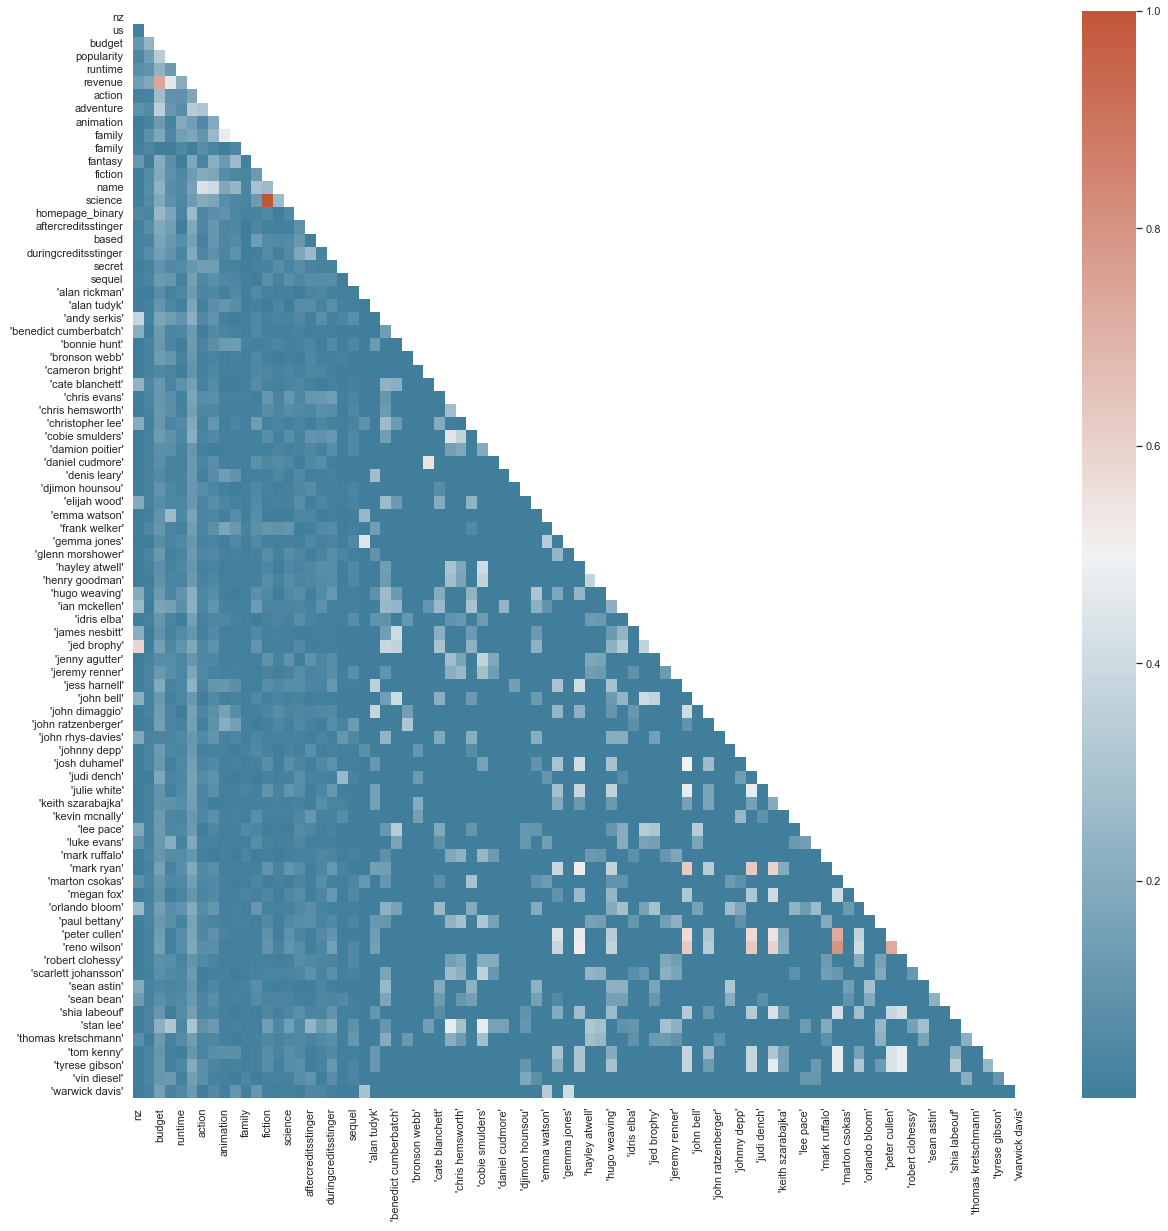

In [18]:
#Visualizing the correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

#Selecting only those columns which have more than 0.1 correlation with revenue since the correlations are pretty low
Correlation_matrix_2 = abs(Correlation_matrix.loc[Correlation_matrix.loc[Correlation_matrix['revenue']> 0.10,'revenue'].index,Correlation_matrix.loc[Correlation_matrix['revenue']> 0.1,'revenue'].index])
sns.set_theme(style="white")


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(Correlation_matrix_2, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(Correlation_matrix_2, mask=mask, cmap=cmap, vmax=1)


We will be using 0.1 correlation as a first stage filter.

## Adding cast statistics (Number of actors, Number of female actors & Number of male actors) 

In [19]:
#Adding number of actors is simply adding the columns having the actors.
num_actors = Data_8.iloc[:,188:1715].apply(sum,axis = 1)
Data_8['num_actors_2'] = num_actors

#Getting the genders of the cast since I have a hypothesis that the composition of cast might matter in revenue
pattern_2 = "(?<='gender': )(\d)"
cast_stat = []
for i in range(len(Data_8)):
    cast_stat.append(list(map(int,(re.findall(pattern_2, Data_8['cast'][i])))))
cast_num = list(map(len,cast_stat))
def male_func(x):
    return x == 2
def female_func(x):
    return x == 1
cast_stat_male = [list(map(male_func, i)) for i in cast_stat]
cast_stat_female = [list(map(female_func, i)) for i in cast_stat]
Data_8['num_male'] = pd.Series(list(map(sum, cast_stat_male)))
Data_8['num_female'] = pd.Series(list(map(sum, cast_stat_female)))
Data_8['num_actors'] = pd.Series(cast_num)
Data_8['male-to-female'] = pd.Series(Data_8['num_male']/Data_8['num_female'])
       
#We observe that these factors indeed have a high correlation hence we will be using these factors(excluding male to female ratio since it has low correlation with revenue) as well in our modelling
Data_8[['num_male','num_female','num_actors','male-to-female','revenue']].corr()

c:\users\harsh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\harsh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\harsh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be 

,num_male,num_female,num_actors,male-to-female,revenue
num_male,1.000000,0.409518,0.752964,0.346790,0.383930
num_female,0.409518,1.000000,0.662725,-0.342629,0.225781
num_actors,0.752964,0.662725,1.000000,0.071827,0.345364
male-to-female,0.346790,-0.342629,0.071827,1.000000,0.076752
revenue,0.383930,0.225781,0.345364,0.076752,1.000000


In [20]:
correlation_matrix_3 = Data_8.corr()

In [21]:
#Reducing dimensionality by dropping columns
Data_9 = Data_8.loc[:,correlation_matrix_3.loc[abs(correlation_matrix_3['revenue']) > 0.1,'revenue'].index]

### For budget and revenue will have to assume that these are in dollars since even if we find the real numbers(in dollar currency) the impact would be miniscule

However we have to take into account the inflation factor if our test set has movies with several years since inflation can increase or decrease the revenue and budget of the movie

In [22]:
#Checking the years in test set
import datetime
test_data = pd.read_csv("C:/Users/harsh/OneDrive/Documents/Kaggle/TMDB Forecasting/tmdb-box-office-prediction/test.csv")
test_data['release_date']

'''Yes there are multiple years hence we will have to take inflation factor, 
taking the inflation factor depends on taking a base that will be the same for both test and train
'''
##Seeing the minimum years in both test and train set
#Test is 1922
release_date_test = pd.to_datetime(test_data['release_date'],format = "%m/%d/%y")
release_date_test[release_date_test.dt.year >2021] -= pd.DateOffset(years = 100)
min(release_date_test.dt.year)

Data_9['release_date'] = Data_8['release_date']

#Train is 1924
release_date_train = pd.to_datetime(Data_9['release_date'],format = "%m/%d/%y")
release_date_train[release_date_train.dt.year >2021] -= pd.DateOffset(years = 100)
min(release_date_train.dt.year)
Data_9['year'] = release_date_train.dt.year

#Hence we should be using 1900 or anything below 1922 as our inflation factor.
inflation_data = pd.read_csv("C:/Users/harsh/OneDrive/Documents/Kaggle/TMDB Forecasting/tmdb-box-office-prediction/inflation_data.csv")
inflation_data.head()

#Dividing the revenue and budget by the inflation factor of their respective years
Data_10 = pd.merge(Data_9,inflation_data, left_on = 'year',right_on = 'year')
Data_10['inflation_adjusted_revenue'] = Data_10['revenue']/Data_10['Factor']
Data_10['inflation_adjusted_budget'] = Data_10['budget']/Data_10['Factor']

# Modelling

## We will start with lasso regression for our modelling

c:\users\harsh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


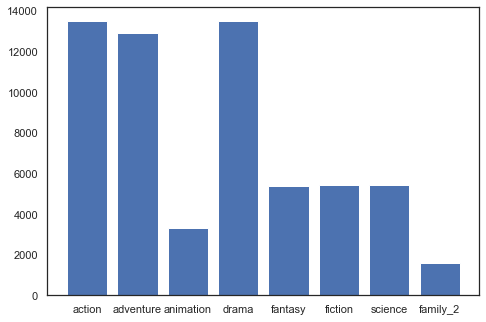

In [23]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import lasso_path
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


#Seeing the average revenues of each category to see if we need to do stratified sampling 
Data_10['family_2'] = Data_10.iloc[:,11]
Data_11 = Data_10.drop(labels = 'family', axis = 1)
categories = ['action','adventure', 'animation', 'drama', 'fantasy', 'fiction','science','family_2']

Cat_revenue = pd.Series()
for i in range(len(categories)):
    Cat_revenue = Cat_revenue.append(pd.Series(pd.Series(Data_10['inflation_adjusted_revenue']*Data_10[categories[i]]).mean())) 
Cat_revenue.index = categories

#Plotting the categories
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(Cat_revenue.index,Cat_revenue)
plt.show()

#So we see that different categories of movies do infact have different average revenues but how do we ascertain if the movie is in one particular category ? 

## Creating a test and train dataset

In [24]:
Data_test_without_target = Data_11.drop(labels = ['inflation_adjusted_revenue','name','release_date','num_actors_2','revenue','year','amount','budget','Factor'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(Data_test_without_target, np.log(Data_11['inflation_adjusted_revenue']), test_size=0.4, random_state=0)

## Modelling with Lasso

In [25]:
from sklearn import linear_model
lasso_1 = linear_model.Lasso(alpha = 0.001,normalize = True)
lasso_1.fit(X_train,y_train)
print(lasso_1.coef_)
print("Total Coefficients:", len(lasso_1.coef_))
print("Non Zero Coefficients:", np.count_nonzero(lasso_1.coef_))

[-3.41752235e-01  1.03471076e+00  3.04695537e-02  1.51572717e-02
  6.83108287e-02  3.96070574e-01  2.95694926e-01 -2.20300628e-01
  0.00000000e+00 -5.60961106e-03 -0.00000000e+00 -1.60516882e-01
  2.58786535e-02  8.64098489e-02  4.06535320e-01 -1.09378458e+00
  9.58940957e-02  6.05614226e-02 -0.00000000e+00 -1.61369622e+00
 -9.77375490e-02  0.00000000e+00 -3.43880846e-01 -2.57427877e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -4.14293609e-01
 -0.00000000e+00 -2.03364099e+00 -0.00000000e+00  0.00000000e+00
  3.91276125e-01 -0.00000000e+00 -7.34646317e-01 -8.05711350e-01
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  5.71229254e-01 -3.53906834e-01  1.88371153e-01
 -0.00000000e+00  0.00000000e+00  2.31996116e-02  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  3.49323574e-01 -0.00000000e+00 -1.32157963e+00 -6.31640851e-02
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -7.69205495e-01
 -1.11585453e+00 -0.00000

c:\users\harsh\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


## Cross validation with Lasso

In [26]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import lasso_path
lasso_2 = LassoCV(alphas = np.arange(0.00001,0.1,0.001))
lasso_2.fit(X_train,y_train)
print(lasso_2.coef_)
EPSILON = 1e-4

[-0.00000000e+00  1.04100116e+00  3.05845643e-02  1.72097008e-02
  1.31946085e-01  3.71410283e-01  3.96836521e-01 -2.92269262e-01
  0.00000000e+00 -6.67025172e-02 -1.35269477e-16 -2.28148783e-01
  0.00000000e+00  1.04497360e-01  3.02530189e-01 -1.03319653e+00
  8.34819199e-02  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000

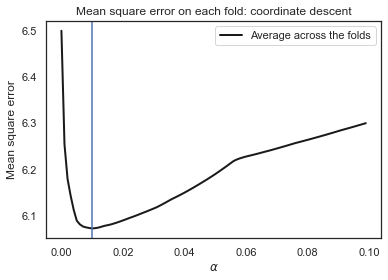

In [27]:
#Display results
plt.figure()
plt.plot(lasso_2.alphas_,lasso_2.mse_path_.mean(axis=-1),"k",label="Average across the folds",linewidth=2)
plt.legend()
plt.axvline(x = lasso_2.alpha_)
plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold: coordinate descent")
plt.axis("tight")
plt.show()

In [28]:
#Lasso Model Evaluation
scores_lasso = cross_val_score(lasso_2, X_train,y_train, cv = 10)
scores_lasso_test = cross_val_score(lasso_2, X_test,y_test, cv = 10)
print("Mean score {:.2f} with a standard deviation of {:.2f} ".format(scores_lasso_test.mean(), scores_lasso_test.std()))

NameError: name 'cross_val_score' is not defined

As you can see the alpha we observe is awfully high, hence we need to use some other modelling method to carry out the analysis

## Modelling with Linear regression

In [29]:
from sklearn.model_selection import cross_val_score
linear_model_1 = linear_model.LinearRegression()
linear_model_1.fit(X_train,y_train)
scores_linear_regression = cross_val_score(linear_model_1, X_test, y_test, cv=10)
print("Mean score {:.2f} with a standard deviation of {:.2f} ".format(scores_linear_regression.mean(), scores_linear_regression.std()))

Mean score 0.24 with a standard deviation of 0.09 


## Transformations to the target and other variables

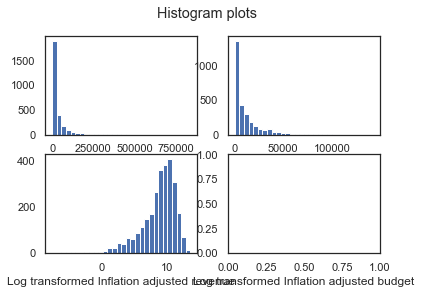

In [30]:
import matplotlib.pyplot as plt
num_bins = 100

def square(x):
    return (x)**2


fig,axs = plt.subplots(2,2)
fig.suptitle('Histogram plots')
axs[0,0].hist(Data_11['inflation_adjusted_revenue'], bins = 30)
axs[0,1].hist(Data_11['inflation_adjusted_budget'], bins = 30)
axs[1,0].hist(np.log(Data_11['inflation_adjusted_revenue']+0.00000000000000000000000000000000000001), bins = 30)


axs[0,0].set_xlabel("Inflation adjusted revenue")
axs[0,1].set_xlabel("Inflation adjusted budget")
axs[1,0].set_xlabel("Log transformed Inflation adjusted revenue")
axs[1,1].set_xlabel("Log transformed Inflation adjusted budget")
plt.show()

#Hence from the graphs we see we can receive better results with a log transformed graph

## Modelling through Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor
random_forest_1 = RandomForestRegressor(n_estimators = 25)
random_forest_1.fit(X_train,y_train)
random_forest_1_score = cross_val_score(random_forest_1,X_train,y_train,cv = 10)
print("Mean score {:.2f} with a standard deviation of {:.2f} ".format(random_forest_1_score.mean(), random_forest_1_score.std()))

Mean score 0.40 with a standard deviation of 0.06 


## Modelling through Adaboost model

In [32]:
from sklearn.ensemble import AdaBoostRegressor
Adaboost_1 = AdaBoostRegressor()
Adaboost_1.fit(X_train,y_train)
Adaboost_1_score = cross_val_score(Adaboost_1,X_train,y_train, cv = 10)
print("Mean score {:.2f} with a standard deviation of {:.2f} ".format(Adaboost_1_score.mean(), Adaboost_1_score.std()))

Mean score 0.23 with a standard deviation of 0.11 


## Modelling through Post Lasso model

In [33]:
coefficients_for_LR = lasso_2.feature_names_in_[lasso_2.coef_!=0]
linear_model_2 = linear_model.LinearRegression()
linear_model_2.fit(X_train[coefficients_for_LR],y_train)
linear_model_2_score = cross_val_score(linear_model_2,X_train[coefficients_for_LR],y_train, cv = 10)
print("Mean score {:.2f} with a standard deviation of {:.2f} ".format(linear_model_2_score.mean(), linear_model_2_score.std()))

Mean score 0.26 with a standard deviation of 0.18 


## Model Selection

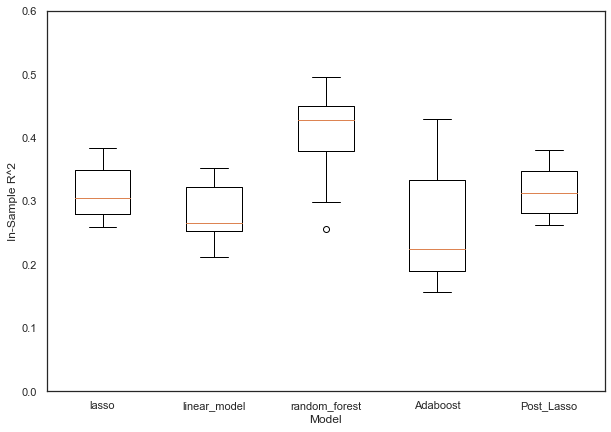

In [34]:
#Model accuracy score (in-sample)
Models = [lasso_2, linear_model_1,random_forest_1,Adaboost_1]
Models_text = ["lasso", "linear_model","random_forest","Adaboost","Post_Lasso"]
Model_score_in_sample = pd.DataFrame()
for i in range(len(Models)):
    Model_score_in_sample[Models_text[i]] = cross_val_score(Models[i],X_train,y_train, cv = 10)

Model_score_in_sample['Post_Lasso'] = linear_model_2_score
fig = plt.figure(figsize = (10,7))
plt.boxplot(Model_score_in_sample)
plt.ylim(0,0.6)
plt.ylabel("In-Sample R^2")
plt.xlabel("Model")
plt.xticks(np.arange(1,6),Models_text)
plt.show()

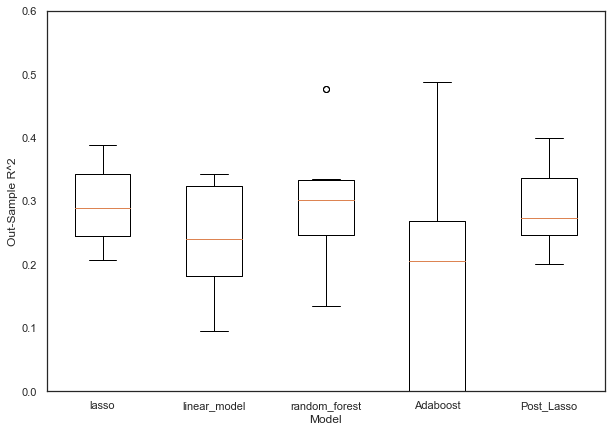

In [35]:
#Model accuracy score (Out-sample)
Models = [lasso_2, linear_model_1,random_forest_1,Adaboost_1]
Models_text = ["lasso", "linear_model","random_forest","Adaboost","Post_Lasso"]
Model_score_out_sample = pd.DataFrame()
for i in range(len(Models)):
    Model_score_out_sample[Models_text[i]] = cross_val_score(Models[i],X_test,y_test, cv = 10)

Model_score_out_sample['Post_Lasso'] = cross_val_score(linear_model_2,X_test[coefficients_for_LR],y_test,cv = 10)
fig = plt.figure(figsize = (10,7))
plt.boxplot(Model_score_out_sample)
plt.ylim(0,0.6)
plt.ylabel("Out-Sample R^2")
plt.xlabel("Model")
plt.xticks(np.arange(1,6),Models_text)
plt.show()

#### Since we observe that random_forest gives us good scores in both In sample and out of sample R^2 hence we will use Random forest to predict the revenue.